In [1]:
!git clone https://github.com/shivigup/sunspots

Cloning into 'sunspots'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [3]:
df = pd.read_csv("sunspots/data/Sunspots.csv")
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
time = df['Date']
series = df['Monthly Mean Total Sunspot Number']
split_time = 2500
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [5]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    #plt.grid(True)

In [6]:
series = series.to_numpy()

In [7]:
window_size = 12
batch_size = 32
shuffle_buffer_size = 1000

In [8]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [9]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>

In [ ]:


model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
20/20 [==============================] - 2s 13ms/step - loss: 142.8417 - mae: 143.3397
Epoch 2/100
20/20 [==============================] - 0s 12ms/step - loss: 137.9685 - mae: 138.4668
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 131.4286 - mae: 131.9272
Epoch 4/100
20/20 [==============================] - 0s 13ms/step - loss: 124.1484 - mae: 124.6480
Epoch 5/100
20/20 [==============================] - 0s 13ms/step - loss: 116.7214 - mae: 117.2197
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 109.5885 - mae: 110.0875
Epoch 7/100
20/20 [==============================] - 0s 13ms/step - loss: 102.9438 - mae: 103.4431
Epoch 8/100
20/20 [==============================] - 0s 13ms/step - loss: 96.5853 - mae: 97.0849
Epoch 9/100
20/20 [==============================] - 0s 14ms/step - loss: 90.5966 - mae: 91.0960
Epoch 10/100
20/20 [==============================] - 0s 13ms/step - loss: 84.7190 - mae: 85.2182
Epoch 11/100
20

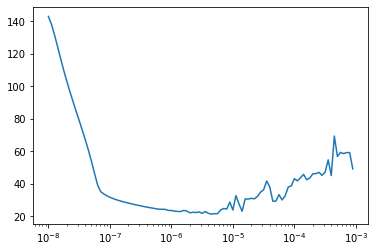

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
#plt.axis([1e-8, 1e-4, 0, 30])

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=5e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset,epochs=400)


Epoch 1/400
20/20 [==============================] - 1s 14ms/step - loss: 55.2631 - mae: 55.7605
Epoch 2/400
20/20 [==============================] - 0s 14ms/step - loss: 31.9612 - mae: 32.4575
Epoch 3/400
20/20 [==============================] - 0s 13ms/step - loss: 27.0165 - mae: 27.5112
Epoch 4/400
20/20 [==============================] - 0s 14ms/step - loss: 24.7380 - mae: 25.2317
Epoch 5/400
20/20 [==============================] - 0s 14ms/step - loss: 23.9274 - mae: 24.4199
Epoch 6/400
20/20 [==============================] - 0s 13ms/step - loss: 23.4774 - mae: 23.9716
Epoch 7/400
20/20 [==============================] - 0s 13ms/step - loss: 23.7516 - mae: 24.2459
Epoch 8/400
20/20 [==============================] - 0s 13ms/step - loss: 26.0447 - mae: 26.5393
Epoch 9/400
20/20 [==============================] - 0s 13ms/step - loss: 23.4084 - mae: 23.9035
Epoch 10/400
20/20 [==============================] - 0s 13ms/step - loss: 22.6517 - mae: 23.1434
Epoch 11/400
20/20 [=========

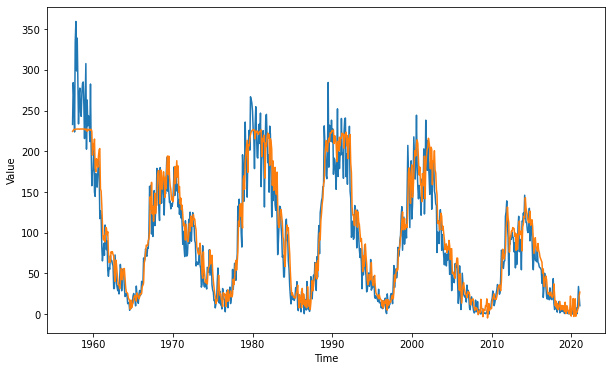

In [ ]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

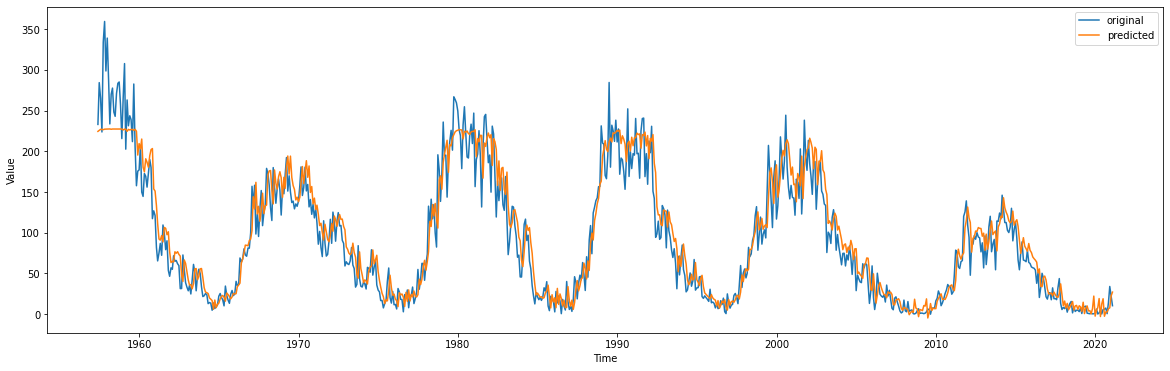

In [ ]:
plt.figure(figsize=(20, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)
plt.legend(["original", "predicted"])
plt.savefig("RNN.png")
plt.show()

In [ ]:
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

681.02606
19.004473


<Figure size 432x288 with 0 Axes>

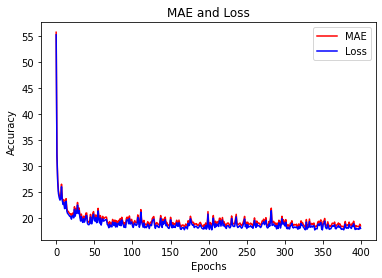

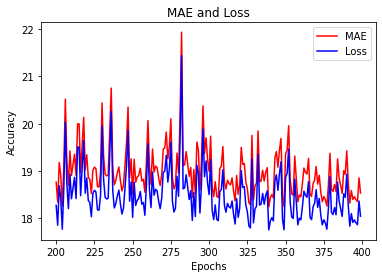

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

LSTM

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
78/78 [==============================] - 7s 17ms/step - loss: 60.2442 - mae: 60.7383
Epoch 2/100
78/78 [==============================] - 1s 16ms/step - loss: 59.2773 - mae: 59.7725
Epoch 3/100
78/78 [==============================] - 1s 18ms/step - loss: 58.2452 - mae: 58.7405
Epoch 4/100
78/78 [==============================] - 2s 18ms/step - loss: 57.1030 - mae: 57.5977
Epoch 5/100
78/78 [==============================] - 1s 17ms/step - loss: 55.3729 - mae: 55.8685
Epoch 6/100
78/78 [==============================] - 1s 16ms/step - loss: 53.9443 - mae: 54.4402
Epoch 7/100
78/78 [==============================] - 1s 16ms/step - loss: 53.0347 - mae: 53.5312
Epoch 8/100
78/78 [==============================] - 1s 16ms/step - loss: 52.1487 - mae: 52.6449
Epoch 9/100
78/78 [==============================] - 1s 17ms/step - loss: 51.2784 - mae: 51.7752
Epoch 10/100
78/78 [==============================] - 1s 17ms/step - loss: 50.4063 - mae: 50.9034
Epoch 11/100
78/78 [=========

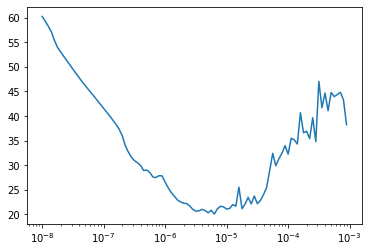

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=5e-6, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500
78/78 [==============================] - 7s 17ms/step - loss: 3690.0317 - mae: 46.3113
Epoch 2/500
78/78 [==============================] - 1s 17ms/step - loss: 3503.3420 - mae: 45.6434
Epoch 3/500
78/78 [==============================] - 2s 18ms/step - loss: 3402.9360 - mae: 44.5498
Epoch 4/500
78/78 [==============================] - 1s 17ms/step - loss: 3371.0371 - mae: 44.7799
Epoch 5/500
78/78 [==============================] - 1s 17ms/step - loss: 3293.8740 - mae: 44.0123
Epoch 6/500
78/78 [==============================] - 1s 17ms/step - loss: 3255.0811 - mae: 43.7280
Epoch 7/500
78/78 [==============================] - 1s 18ms/step - loss: 3502.1182 - mae: 45.8329
Epoch 8/500
78/78 [==============================] - 1s 18ms/step - loss: 3568.7861 - mae: 46.2010
Epoch 9/500
78/78 [==============================] - 1s 17ms/step - loss: 3375.6724 - mae: 44.5613
Epoch 10/500
78/78 [==============================] - 1s 18ms/step - loss: 3390.3767 - mae: 44.5748
Epoch 11/

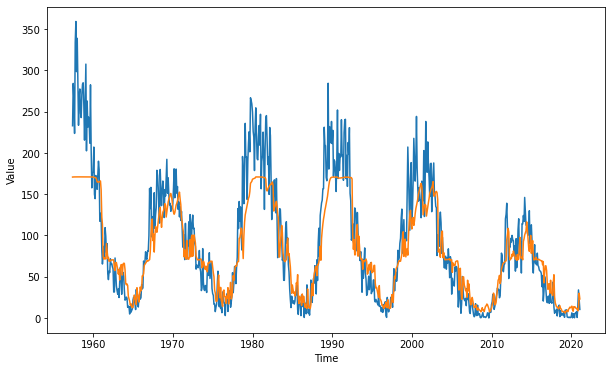

In [ ]:
forecast = []
results = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()
tf.keras.metrics.mean_squared_error(x_valid, results).numpy()

4105.8394

<Figure size 432x288 with 0 Axes>

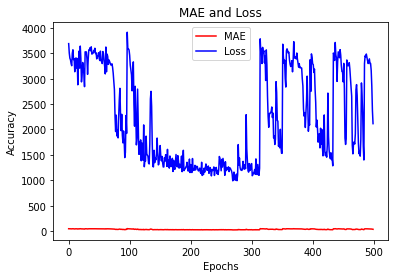

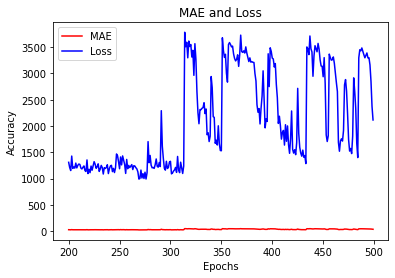

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

In [ ]:
# This code block will take some time to run.
# But it will run in the background, without displaying/printing 
# the information about the number of epochs.

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset,epochs=100, verbose=1)

Epoch 1/100
78/78 [==============================] - 6s 17ms/step - loss: 2727.9407
Epoch 2/100
78/78 [==============================] - 1s 16ms/step - loss: 2255.1521
Epoch 3/100
78/78 [==============================] - 1s 17ms/step - loss: 2458.8801
Epoch 4/100
78/78 [==============================] - 1s 17ms/step - loss: 2617.9106
Epoch 5/100
78/78 [==============================] - 1s 18ms/step - loss: 2789.2512
Epoch 6/100
78/78 [==============================] - 1s 18ms/step - loss: 2555.2195
Epoch 7/100
78/78 [==============================] - 1s 17ms/step - loss: 2390.3162
Epoch 8/100
78/78 [==============================] - 1s 16ms/step - loss: 2473.1147
Epoch 9/100
78/78 [==============================] - 1s 17ms/step - loss: 2555.7068
Epoch 10/100
78/78 [==============================] - 1s 17ms/step - loss: 2393.4929
Epoch 11/100
78/78 [==============================] - 1s 17ms/step - loss: 2936.0029
Epoch 12/100
78/78 [==============================] - 1s 16ms/step - loss:

In [ ]:
tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))
model.fit(dataset,epochs=100)